# Jupyter-lab

Here are the most important things to know about running a Jupyter notebook:

1. Notebooks are made up of code cells and text cells (and a few other
  less common kinds).  Code cells contain code; text cells contain explanatory text written in
  [Markdown](https://www.markdownguide.org/).

2. To run a code cell, click the cell to select it and press
  Shift-Enter.  The output of the code should appear below the cell.

3. In general, notebooks only run correctly if you run every code cell
  in order from top to bottom.  If you run cells out of order, you are
  likely to get errors.

4. You can modify existing cells, but then you have to run them again
  to see the effect.

5. You can add new cells, but you need to be careful about the
  order you run them in.

6. If you have added or modified cells, and the behavior of the
  notebook seems strange, you can restart the "kernel", which clears all
  of the variables and functions you have defined, and run the cells
  again from the beginning.

- If you are using Jupyter Notebook, open the `Kernel` menu and select
  "Restart and Run All".

- In Jupyter Lab, open the `Kernel` menu and select "Restart Kernel
  and Run All Cells".

Before you continue with this lesson, you might want to explore the other menus and the
toolbar to see what else you can do.


# SQL queries

SQL stands for Structured Query Language and it is used to explore and download data from a database.

ADQL stands for Astronomical Data Query Language and it is similar to SQL.


We will here explore the **SDSS database** which contains catalogs, spectra, and images.

Using ADQL:

https://astroquery.readthedocs.io/en/latest/sdss/sdss.html

More information using SQL is available at the SDSS website:

https://www.sdss4.org/dr17/tutorials/segue_sqlcookbook/

Detailed information about the schema of the database are available at:

https://skyserver.sdss.org/dr6/en/help/browser/browser.asp

## Direct query

Since radius <= 3 arcmin, useful when searching for one or few objects

In [23]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, radius='1 arcmin', spectro=False)
xid[:5]

ra,dec,objid,run,rerun,camcol,field
float64,float64,uint64,int64,int64,int64,int64
2.01969106545607,14.8519612314357,1237649953859175315,1043,301,3,14
2.01984159668518,14.8522206387765,1237653651835782097,1904,301,3,163
2.01985001347754,14.8522143358364,1237653651835847538,1904,301,3,164
2.02738022174219,14.8500180662154,1237649816422187643,1011,301,3,44
2.02166364602635,14.8383377971412,1237653651835781247,1904,301,3,163


In [13]:
xid = SDSS.query_region(pos, radius='1 arcmin', spectro=True)
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,uint64,int64,int64,int64,int64,float64,int64,int64,int64,uint64,int64
2.02344596573482,14.8398237551311,1237652943176138868,1739,301,3,315,0.04559058,751,52251,160,845594848269461504,26


In [14]:
# Get the spectrum
sp = SDSS.get_spectra(matches=xid)

In [15]:
# Info
sp[0].info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     139   ()      
  1  COADD         1 BinTableHDU     26   3841R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B1-00012103-00012101-00012102    1 BinTableHDU    146   2044R x 7C   [E, E, E, J, E, E, E]   
  5  B1-00012104-00012101-00012102    1 BinTa

In [19]:
# Check the Coadd table
spectrum = sp[0]['COADD']
spectrum.columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

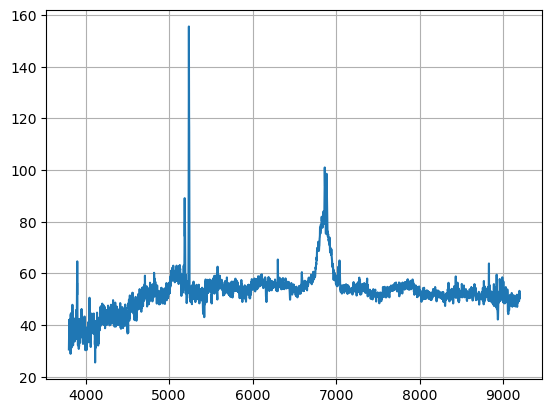

In [20]:
# Plot the spectrum

import matplotlib.pyplot as plt
plt.plot(10**spectrum.data['loglam'], spectrum.data['flux'])
plt.grid()

### Exercise

Select the sky extension and plot the sky vs wavelength

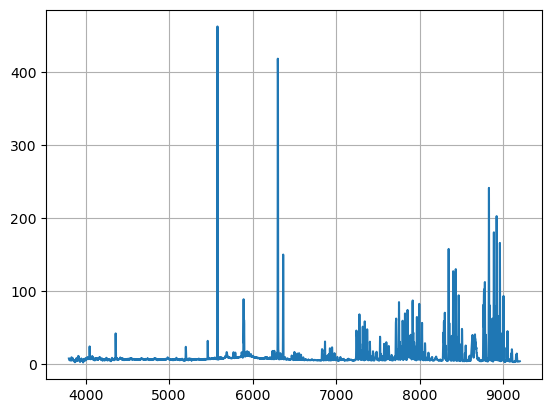

In [42]:
import matplotlib.pyplot as plt
plt.plot(10**spectrum.data['loglam'], spectrum.data['sky'])
plt.grid()

## SQL query


- `SELECT` indicates that we are selecting data (as opposed to adding
  or modifying data).

- `TOP` indicates that we only want the first 10 rows of the table,
  which is useful for testing a query before asking for all of the data.

- `FROM` specifies which table we want data from.


In [33]:
from astroquery.sdss import SDSS

query = """SELECT 
TOP 100
objID, ra ,dec
FROM
PhotoPrimary
"""

res = SDSS.query_sql(query)
display(res[:4])

objID,ra,dec
uint64,float64,float64
1237651758284999323,269.998611639511,0.00196215120961481
1237651758284999326,269.997628832911,0.000513699107726668
1237651758284999348,270.00269749521,-0.000544961535222983
1237651758284999319,270.00047971351,0.00299723797180513


## WHERE condition


In a `WHERE` clause, you can use any of the [SQL comparison
operators](https://www.w3schools.com/sql/sql_operators.asp); here are
the most common ones:

| Symbol | Operation             | 
| ------ | :-------------------- |
| `>`       | greater than          | 
| `<`       | less than             | 
| `>=`       | greater than or equal | 
| `<=`       | less than or equal    | 
| `=`       | equal                 | 
| `!=` or `<>`   | not equal             | 

Most of these are the same as Python, but some are not.  In
particular, notice that the equality operator is `=`, not `==`.
Be careful to keep your Python out of your ADQL!

You can combine comparisons using the logical operators:

- AND: true if both comparisons are true
- OR: true if either or both comparisons are true

Finally, you can use `NOT` to invert the result of a comparison.


In [43]:
from astroquery.sdss import SDSS

query = """SELECT 
TOP 100
objID, ra ,dec
FROM
PhotoPrimary
WHERE
ra > 185 and ra < 185.1
AND dec > 15 and dec < 15.1
"""

res = SDSS.query_sql(query)
display(res[:4])

objID,ra,dec
uint64,float64,float64
1237662525765845762,185.000342774789,15.0828665810675
1237662525765845761,185.000451257654,15.0529719971593
1237664290465317383,185.000952435663,15.0008003299125
1237662525765845595,185.001144345363,15.0125165743887


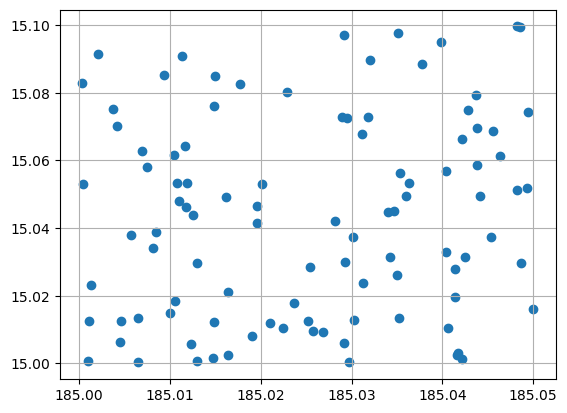

In [46]:
# Plot
import matplotlib.pyplot as plt

plt.scatter(res['ra'], res['dec'])
plt.grid()


In [67]:
query = """SELECT 
TOP 1000
objID, ra, dec, cModelMag_g
FROM Galaxy
WHERE
cModelMag_g between 18 and 19
"""
res = SDSS.query_sql(query)
res[:5]

objID,ra,dec,cModelMag_g
uint64,float64,float64,float64
1237646794377921318,87.3510017544352,1.33918874833868,18.39814
1237661957218828357,193.613385751407,51.0767099231511,18.22117
1237661957218828388,193.643267073334,50.9408701944552,18.22677
1237661957218828395,193.667741278739,50.951544783856,18.11527
1237661957218894083,194.013451608245,51.0528771969855,18.6441


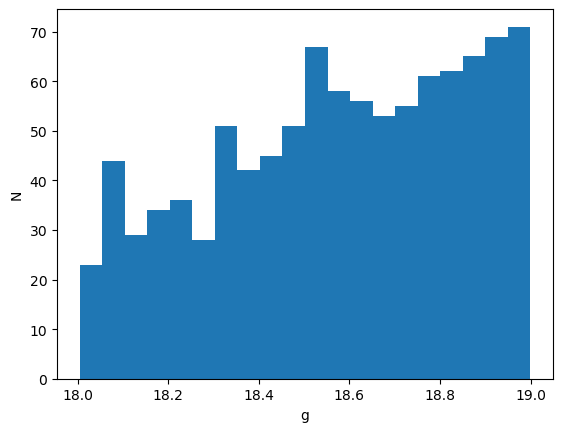

In [68]:
# Plot histogram
import matplotlib.pyplot as plt
import numpy as np

counts, bins = np.histogram(res['cModelMag_g'], bins=20)
plt.stairs(counts, bins,fill=True)
plt.xlabel('g')
plt.ylabel('N')
plt.show()

### Exercise

Go to https://skyserver.sdss.org/dr6/en/help/browser/browser.asp

Select the Table SpecPhotoAll and download the redshifts (z) in the region 185 < RA < 186 and 10 < Dec < 11
Then plot an histogram with 30 bins.

In [60]:
from astroquery.sdss import SDSS

query = """SELECT 
objID, ra ,dec, z
FROM
SpecPhotoAll
WHERE
ra > 185 and ra < 186
AND dec > 10 and dec < 11
"""

res = SDSS.query_sql(query)
res[:5]

objID,ra,dec,z
uint64,float64,float64,float64
1237658492818358378,185.02221,10.073143,0.7161146
1237658492818424417,185.09032,10.103223,0.6688943
1237662238003298844,185.01423,10.412286,0.4842684
1237662238003364213,185.10375,10.372711,0.6324341
1237662238003298921,185.04678,10.241765,0.4882119


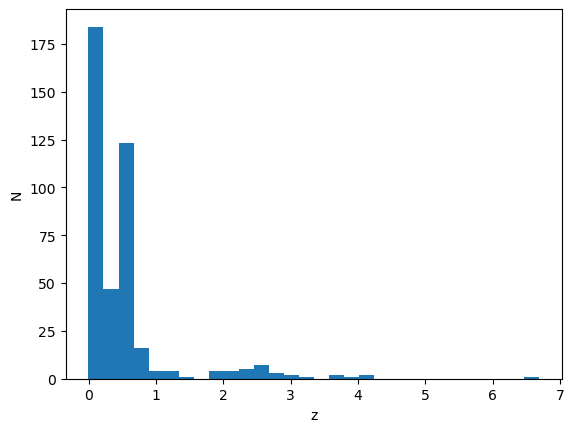

In [64]:
# Plot histogram
import matplotlib.pyplot as plt
import numpy as np

counts, bins = np.histogram(res['z'], bins=30)
plt.stairs(counts, bins,fill=True)
plt.xlabel('z')
plt.ylabel('N')
plt.show()

## COUNT

Useful to explore the query before downloading the data

In [37]:
query = """SELECT 
COUNT(ra)
FROM
PhotoPrimary
WHERE
ra > 185 and ra < 185.1
AND dec > 15 and dec < 15.1
"""

res = SDSS.query_sql(query)
display(res)

Column1
int64
213


## Formatting queries

In [38]:
query_base = """SELECT 
COUNT (z)
FROM specObj
WHERE class = 'galaxy'
  AND z > {z0} AND z < {z1}
  AND zWarning = 0
"""
query = query_base.format(z0=1, z1=2)
res = SDSS.query_sql(query)
res

Column1
int64
24268


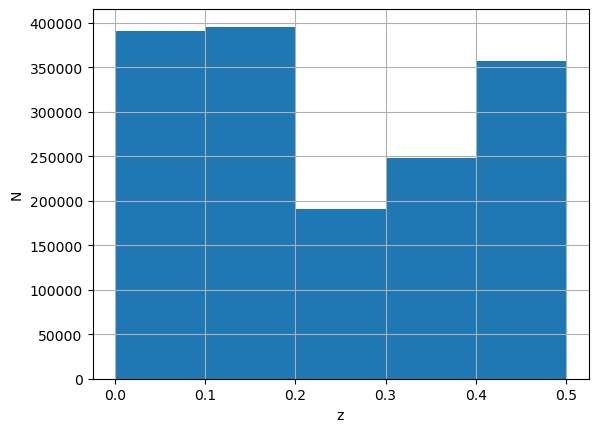

In [75]:
import numpy as np

N = np.zeros(5)
step = 0.1
query = query_base.format(z0=0, z1=0.1)
res = SDSS.query_sql(query)
N[0] = res['Column1'].value[0]
query = query_base.format(z0=0.1, z1=0.2)
res = SDSS.query_sql(query)
N[1] = res['Column1'].value[0]
query = query_base.format(z0=0.2, z1=0.3)
res = SDSS.query_sql(query)
N[2] = res['Column1'].value[0]
query = query_base.format(z0=0.3, z1=0.4)
res = SDSS.query_sql(query)
N[3] = res['Column1'].value[0]
query = query_base.format(z0=0.4, z1=0.5)
res = SDSS.query_sql(query)
N[4] = res['Column1'].value[0]

zbin = np.arange(0,0.5+step,step)
plt.stairs(N, zbin, fill=True)
plt.xlabel('z')
plt.ylabel('N')
plt.grid()
plt.show()

### Exercise

Count the z in the Table specObj in intervals of 0.01  between 0 and 2.

Use a for loop to build the array.

Then plot the result as before.

In [77]:
# A plot of redshifts

import numpy as np

query_base = """SELECT 
COUNT (z)
FROM specObj
WHERE class = 'galaxy'
  AND z > {z0} AND z < {z1}
  AND zWarning = 0
"""

step = 0.01
z0 = np.arange(0,2,step)

n = []
for z0_ in z0:
    query = query_base.format(z0=z0_, z1=z0_+step)
    res = SDSS.query_sql(query)
    n.append(res['Column1'].value[0]) 

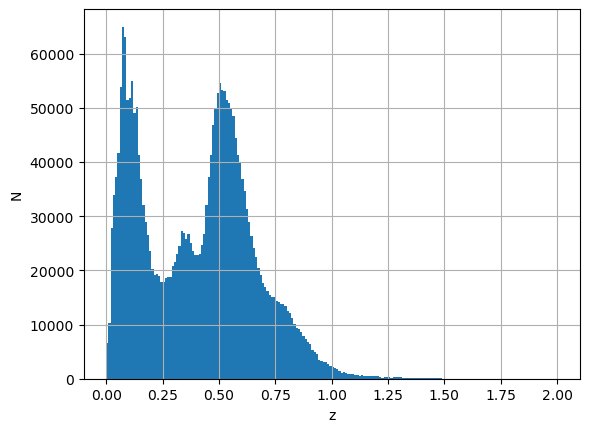

In [78]:
zbin = np.arange(0,2+step,step)
plt.stairs(n, zbin, fill=True)
plt.xlabel('z')
plt.ylabel('N')
plt.grid()
plt.show()

## Troubleshooting

In [ ]:
from astroquery.sdss import SDSS
SDSS.clear_cache()